<a href="https://www.kaggle.com/code/najeebz/binary-classification-cnn-deep-learning-pruned?scriptVersionId=158426871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/overview)
### Playground Series - Season 4, Episode 1
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


[Walter Reade, Ashley Chow. (2024). Binary Classification with a Bank Churn Dataset . Kaggle.](https://kaggle.com/competitions/playground-series-s4e1)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/najeebz/binary-classification-deep-learning-cnn-model)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Binary Classification with a Bank Churn Dataset. Competition Submission. Kaggle. https://www.kaggle.com/najeebz/binary-classification-deep-learning-cnn-model

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from warnings import filterwarnings;
filterwarnings('ignore');

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Reading the Dataset

In [46]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

# Exploratory Data Analysis:

In [47]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [48]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


### Exited column is to be predicted.

In [49]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [50]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## No Null values, but there are few categorical columns, should be converted into numbers.

## Let's analyze these

In [51]:
df.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [52]:
df.NumOfProducts.value_counts()


NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [53]:
df.IsActiveMember.describe()

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64

In [54]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Data Wrangling:

## Data Frames with Columns to be used:

In [55]:
train_df=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
train_df
test_df=test[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [56]:
def colchange(train_df):
    train_df['Geography']=pd.to_numeric(train_df['Geography'].replace(['France','Spain', 'Germany'],[0,0.5,1]))
    train_df['Gender']=pd.to_numeric(train_df['Gender'].replace(['Male','Female'],[1,0]))
    return(train_df)
train_df=colchange(train_df)
test_df=colchange(test_df)
train_df['Exited']=pd.Categorical(train_df['Exited'])
print(test_df.info())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  float64
 2   Gender           110023 non-null  int64  
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 8.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   CreditScore      165034 non-null  int64   
 1   Geography 

# Pre-Processing for Model:

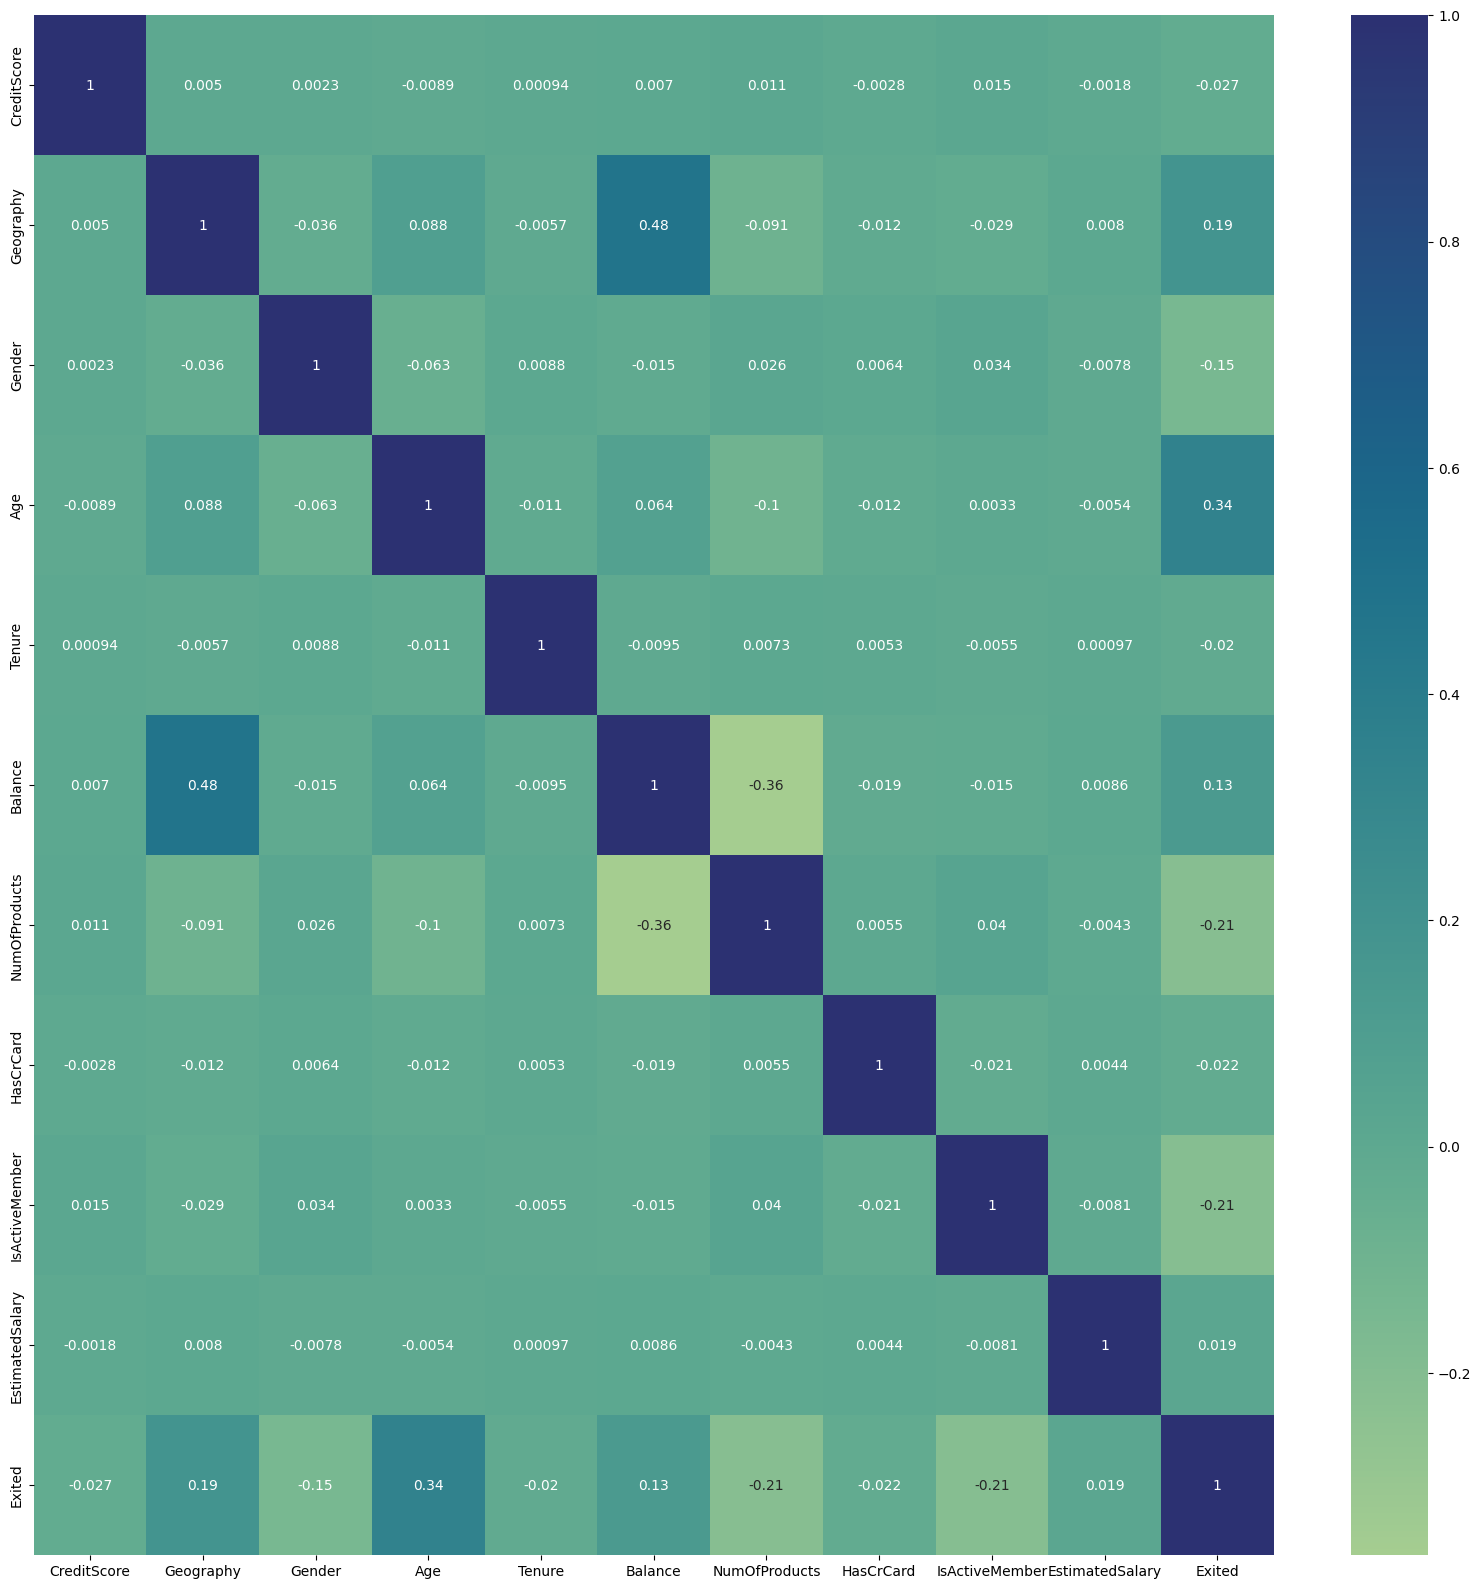

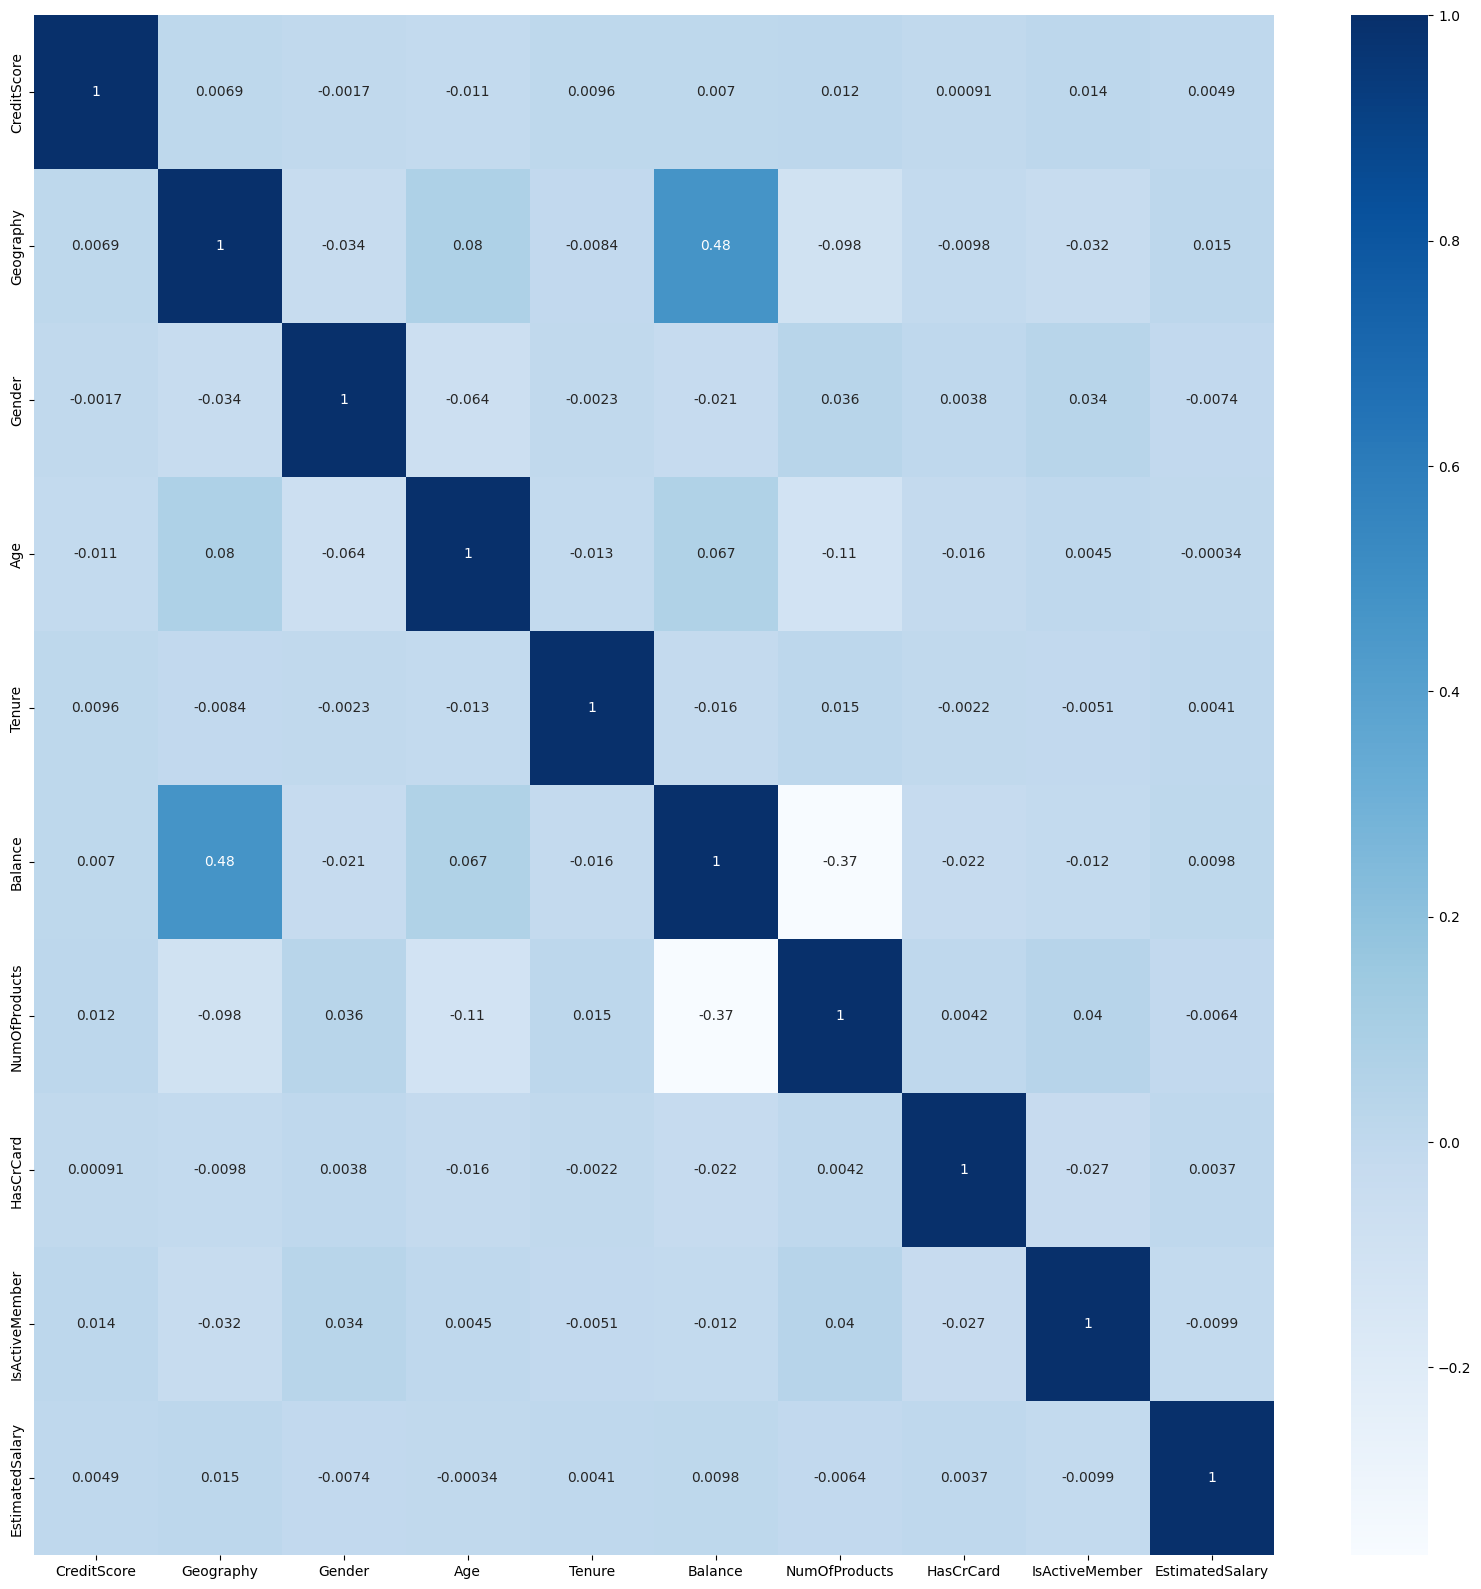

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='crest')
corr = test_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='Blues')

In [58]:
train_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0.0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0.0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0.0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0.0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,0.5,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0.5,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,0.0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,0.0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,0.5,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Creating Testing and Training Datasets for Model Training and Evaluation:

## Scaling the Data

In [59]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [60]:
X=train_df.drop(columns=['Exited'])
y=train_df[['Exited']]
print(X.describe())
print(y.describe())

         CreditScore      Geography         Gender            Age  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean      656.454373       0.319404       0.564429      38.125888   
std        80.103340       0.403149       0.495833       8.867205   
min       350.000000       0.000000       0.000000      18.000000   
25%       597.000000       0.000000       0.000000      32.000000   
50%       659.000000       0.000000       1.000000      37.000000   
75%       710.000000       0.500000       1.000000      42.000000   
max       850.000000       1.000000       1.000000      92.000000   

              Tenure        Balance  NumOfProducts      HasCrCard  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean        5.020353   55478.086689       1.554455       0.753954   
std         2.806159   62817.663278       0.547154       0.430707   
min         0.000000       0.000000       1.000000       0.000000   
25%         3.000000       0.0000

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.8, random_state=42)
X.keys()
test_df=scale(test_df)

# Function to visualize the Model Learning:

In [1]:
def plot_history(history):
    hist1=pd.DataFrame(history.history)
    hist1['epoch']=history.epoch
#hist1=hist.tail(550)
#sns.lineplot(data=histsamp, y='val_mse', x='epoch')

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist1['epoch'],hist1['mae'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mae'], label='Val_Error')
    plt.legend()
#plt.ylim([0, 0.2])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist1['epoch'],hist1['mse'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mse'], label='Val_Error')
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Binary Accuracy')
    plt.plot(hist1['epoch'],hist1['binary_accuracy'], label='Binary Accuracy')
    plt.plot(hist1['epoch'], hist1['val_binary_accuracy'], label='Val Binary Accuracy')
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist1['epoch'],hist1['loss'], label='Loss')
    plt.plot(hist1['epoch'], hist1['val_loss'], label='Val Loss')
    plt.legend()

# Creating the Model:

In [70]:
import tensorflow as tf
tf.random.set_seed(42)
model=tf.keras.Sequential([
  tf.keras.layers.Dense(128,activation='relu', use_bias=True, input_shape=[len(X.keys())]),
  tf.keras.layers.Dense(512, activation='relu', use_bias=True),
  tf.keras.layers.Dense(1024, activation='relu', use_bias=True),
  tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001) , loss='binary_focal_crossentropy', metrics=['mae','binary_crossentropy','binary_accuracy'])

## Pruning the Model:

In [64]:
!pip install tensorflow_model_optimization

In [71]:
def prune_model(model, X_train,y_train):
    from tensorflow_model_optimization.sparsity import keras as sparsity
# Define the pruning schedule, e.g., from 50% to 80% sparsity
    pruning_schedule = sparsity.PolynomialDecay(initial_sparsity=0.50,
                                           final_sparsity=0.80,
                                           begin_step=0,
                                           end_step=1000)
# Apply pruning to the entire model
    print(model.summary())
    pruned_model = sparsity.prune_low_magnitude(model, pruning_schedule=pruning_schedule)
    print('Pruning Model')
    print(pruned_model.summary())

# Train the model as usual
    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.fit(X_train,y_train, epochs=2)
# Finally, make sure to strip the pruning wrappers for final inference
    final_model = sparsity.strip_pruning(pruned_model)
    final_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['mae','mse','binary_accuracy'])
    print('Summary of Pruned Model: \n')
    print(final_model.summary())
    return final_model



In [72]:
final_model=prune_model(model, X_train,y_train)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               1408      
                                                                 
 dense_29 (Dense)            (None, 512)               66048     
                                                                 
 dense_30 (Dense)            (None, 1024)              525312    
                                                                 
 dense_31 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 593793 (2.27 MB)
Trainable params: 593793 (2.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Pruning Model
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape  

# Starting the Training:

In [73]:

epoch=150
early_stop=tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            min_delta=0.0001,
                                            patience=(epoch/10),
                                            start_from_epoch=5,
                                            mode='min')
#history=final_model.fit(X_train,y_train, epochs=epoch, validation_split=0.1)
history=final_model.fit(X_train,y_train, epochs=epoch, validation_split=0.1,callbacks=[early_stop])


Epoch 1/10
3714/3714 [==============================] - 37s 10ms/step - loss: 0.3272 - mae: 0.2004 - mse: 0.1001 - binary_accuracy: 0.8630 - val_loss: 0.3201 - val_mae: 0.2033 - val_mse: 0.0974 - val_binary_accuracy: 0.8670
Epoch 2/10
3714/3714 [==============================] - 36s 10ms/step - loss: 0.3253 - mae: 0.1993 - mse: 0.0996 - binary_accuracy: 0.8638 - val_loss: 0.3197 - val_mae: 0.1939 - val_mse: 0.0977 - val_binary_accuracy: 0.8675
Epoch 3/10
3714/3714 [==============================] - 37s 10ms/step - loss: 0.3246 - mae: 0.1989 - mse: 0.0994 - binary_accuracy: 0.8643 - val_loss: 0.3212 - val_mae: 0.1957 - val_mse: 0.0980 - val_binary_accuracy: 0.8657
Epoch 4/10
3714/3714 [==============================] - 36s 10ms/step - loss: 0.3236 - mae: 0.1985 - mse: 0.0991 - binary_accuracy: 0.8638 - val_loss: 0.3200 - val_mae: 0.1953 - val_mse: 0.0980 - val_binary_accuracy: 0.8662
Epoch 5/10
3714/3714 [==============================] - 36s 10ms/step - loss: 0.3231 - mae: 0.1980 - mse

1032/1032 [==============================] - 4s 3ms/step - loss: 0.3219 - mae: 0.1997 - mse: 0.0992 - binary_accuracy: 0.8643
Test accuracy: [0.3219008147716522, 0.19967664778232574, 0.0991964191198349, 0.8642712235450745]


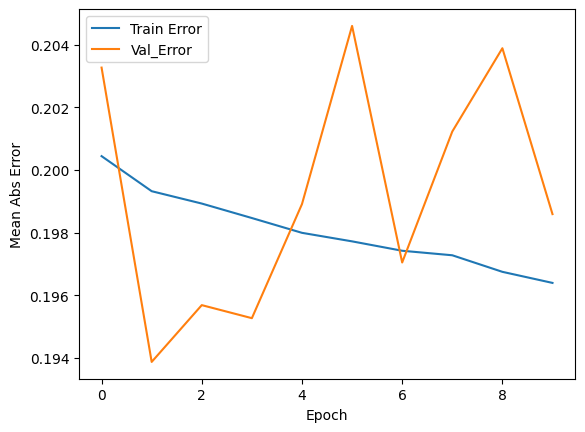

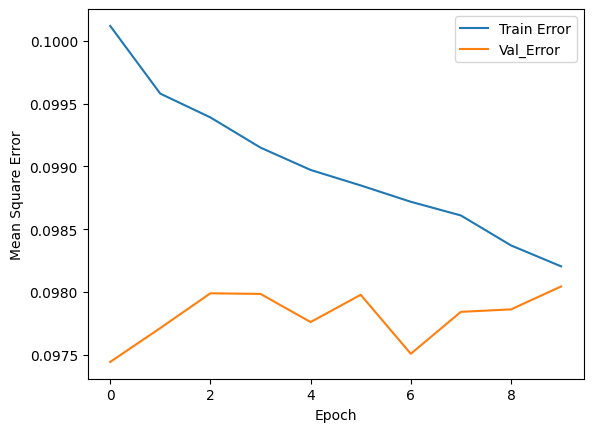

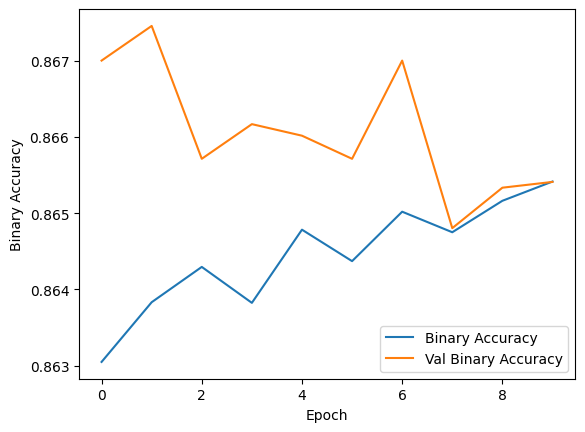

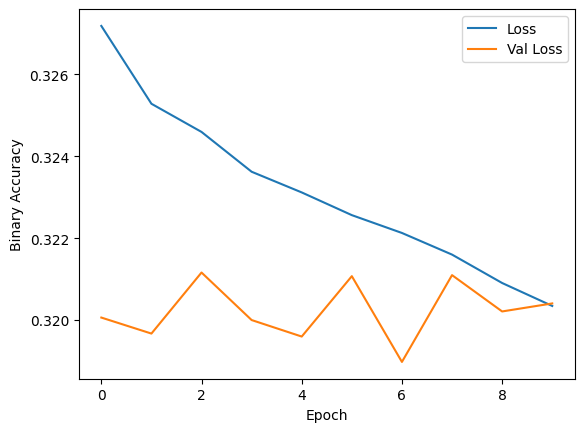

In [74]:
print('Test accuracy:', final_model.evaluate(X_test,y_test))
plot_history(history)


# Preparing the submission

In [75]:
y_pred=final_model.predict(X_test)
print('Predictions:', y_pred)
result=final_model.predict(scale(test_df))

1032/1032 [==============================] - 3s 3ms/step
Predictions: [[0.13440892]
 [0.01610739]
 [0.89621454]
 ...
 [0.3342812 ]
 [0.00664227]
 [0.03601621]]
3439/3439 [==============================] - 11s 3ms/step


## Creating the submission file:

In [80]:
submission=pd.DataFrame(columns=['id','Exited'])
submission['id']=test[['id']]
submission['Exited']=np.round_(result, decimals = 1)

In [79]:
submission.to_csv('submission.csv',index=False)